# Validacion prediccion control

## Carga de modelos

In [2]:
from joblib import dump, load
import pickle
import pandas as pd

loaded_model = pickle.load(open('RNmodel.sav', 'rb'))

sc=load('std_scaler.bin')

dim=load('dim_sacaler_17to10.bin')

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator MLPRegressor from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator PCA from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please r

## Carga de dataset a evaluar

In [9]:
datos=pd.read_excel("/content/drive/MyDrive/Proyecto grado Privado Luis/data_set_moderno_final.xlsx") 


dfX=datos[['TDS_n1','TDS_n2','TDS_n3','TDS_n4','TDS_n5','TDS_n6',
                 'Temp_n1','Temp_n2','Temp_n3','Temp_n4','Temp_n5','Temp_n6',
                 'Hora','CL','CC','CO','CA']]
dfY=datos[['TDS','Temp']]

dfX.head(5)

,TDS_n1,TDS_n2,TDS_n3,TDS_n4,TDS_n5,TDS_n6,Temp_n1,Temp_n2,Temp_n3,Temp_n4,Temp_n5,Temp_n6,Hora,CL,CC,CO,CA
0,308.159210,307.110962,303.065948,304.572388,299.702545,299.434235,23.4375,24.0000,23.7500,23.9375,23.8750,23.3750,20,0.003333,0.21,0.93,0.03
1,315.479401,308.159210,307.110962,303.065948,304.572388,299.702545,23.2500,23.4375,24.0000,23.7500,23.9375,23.8750,22,0.003333,0.20,0.97,0.19
2,317.075775,315.479401,308.159210,307.110962,303.065948,304.572388,22.7500,23.2500,23.4375,24.0000,23.7500,23.9375,0,0.003333,0.74,0.40,0.48
3,314.531128,317.075775,315.479401,308.159210,307.110962,303.065948,22.4375,22.7500,23.2500,23.4375,24.0000,23.7500,2,0.003333,0.93,0.35,0.87
4,310.909424,314.531128,317.075775,315.479401,308.159210,307.110962,22.1875,22.4375,22.7500,23.2500,23.4375,24.0000,4,0.003333,0.90,0.30,0.95


In [10]:
data_x=dfX.values
data_y=dfY.values
#print(data_y)

## Prediccion con los modelos de control para validar

In [11]:
norm=sc.transform(data_x)

In [12]:
dimen=dim.transform(norm)

In [13]:
pred=loaded_model.predict(dimen)

## Calculo metricas

[Text(0.5, 0, 'TDS'), Text(0, 0.5, 'TDS'), Text(0.5, 1.0, 'r2 TDS')]

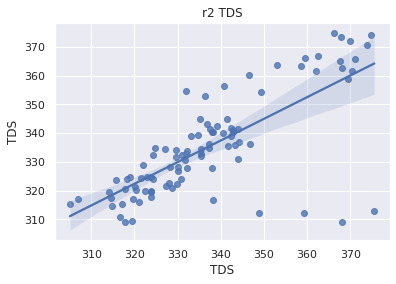

In [20]:
import seaborn as sb
sb.set_theme(color_codes=True)

ax = sb.regplot(x=pred[:,0] ,y=data_y[:,0], color="b")
ax.set(xlabel ="TDS", ylabel = "TDS", title ='r2 TDS')


[Text(0.5, 0, 'Temp'), Text(0, 0.5, 'Temp'), Text(0.5, 1.0, 'r2 Temp')]

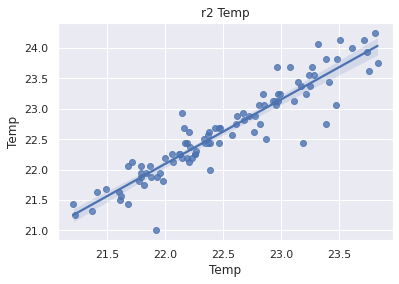

In [21]:
import seaborn as sb
sb.set_theme(color_codes=True)
ax = sb.regplot(x=pred[:,1] ,y=data_y[:,1], color="b")
ax.set(xlabel ="Temp", ylabel = "Temp", title ='r2 Temp')

Numeric Results of R2

In [26]:
from sklearn.metrics import r2_score
print("TDS r2:",r2_score(pred[:,0], data_y[:,0]))
print("TEMP r2:",r2_score(pred[:,1], data_y[:,1]))

TDS r2: 0.4467577382196657
TEMP r2: 0.7894018742222686
